In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
from scipy import integrate

%config InlineBackend.figure_format = 'svg' 
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

### Exercise 1

Consider a square potential of width $w$ and height $V$. Using Schrodinger equation it is possible to show that the energy levels $E_n$ of a quantum particle of mass $m$ inside the well satisfy the relations:

\begin{equation}
\tan{\sqrt{w^2 m E_n / 2 \hbar^2}} = \sqrt{ {(V-E_n)/E_n} }, \;\;\; n = 0,2,4,\ldots
\end{equation}

\begin{equation}
\tan{\sqrt{w^2 m E_n / 2 \hbar^2}} = -\sqrt{ {E_n/(V-E_n)} }, \;\;\; n = 1,3,5,\ldots
\end{equation}

Consider an electron (${m = 0.51 \times 10^6 / c^2}$ eV, $c = 3 \times 10^8 \, {\rm m/s}$) in a well with $V = 20$ eV and $w = 10^{-9}$ m. For the reduced Planck constant take the value $\hbar = 6.582 \times 10^{-16}$ eV s

First of all, let's define all the constants of the problem (note the use of exponential notation and make explicit that quantities are double).

In [3]:
_c_ = 3.0e+8
_m_ = 0.51e+6/_c_/_c_
_V_ = 20.0
_w_ = 1.0e-9
_hbar_ = 6.582e-16

1. Plot on the same graph the three functions $y_1 = \tan{\sqrt{w^2 m E / 2 \hbar^2}}$, $y_2 = \sqrt{ {(V-E)/E} }$, $y_3 = -\sqrt{ {E/(V-E)} }$, from $E = 0$ to $E = 6$ eV. You can use this plot to get a by eye estimate of the energy levels.

In [4]:
def compute_y1(E):
    return np.tan( (_w_/_hbar_) * np.sqrt(_m_*E/2) )

def compute_y2(E):
    return np.sqrt((_V_-E)/E)

def compute_y3(E):
    return -np.sqrt(E/(_V_-E))

Before starting the computation, let's analyze the domain of these functions.
We have that
1. $y_1$ is well defined for $E \geq 0$ eV and $E\neq (2n+1)^2 \frac{\pi^2 \hbar^2}{2 w^2 m}$, where $n=0,1,2,...$;
2. $y_2$ is well defined for $0< E \leq 20$ eV;
3. $y_3$ is well defined for $0 \leq E < 20$ eV.

The first singularities for the $\tan()$ function are at $E_\mathrm{sing} \approx 0.38, 3.40, 9.43, ...$ eV.
Therefore, in the energy range $0< E< 6$ eV all these three functions are well defined except in two points.

In [5]:
En = np.linspace(1e-2, 6.0, 1000)

y1 = compute_y1(En)
y2 = compute_y2(En)
y3 = compute_y3(En)

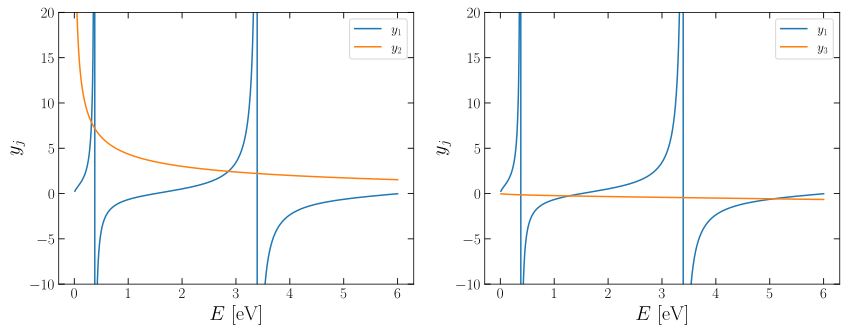

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

######################################################

ax[0].plot(En, y1, label=r'$y_1$')
ax[0].plot(En, y2, label=r'$y_2$')

ax[0].set_ylim(-10., 20.)

ax[0].set_xlabel(r'$E\ [\mathrm{eV}]$', fontsize=20)
ax[0].set_ylabel(r'$y_j$', fontsize=20)

######################################################

ax[1].plot(En, y1, label=r'$y_1$')
ax[1].plot(En, y3, label=r'$y_3$')

ax[1].set_ylim(-10., 20.)

ax[1].set_xlabel(r'$E\ [\mathrm{eV}]$', fontsize=20)
ax[1].set_ylabel(r'$y_j$', fontsize=20)

######################################################

for index_c in range(2):

    ax[index_c].tick_params(axis='x', which='both', direction='in', top=True, labelsize=15)
    ax[index_c].tick_params(axis='x', which='major', width=0.9, length=6)
    ax[index_c].tick_params(axis='x', which='minor', width=0.9, length=6)
    ax[index_c].tick_params(axis='y', which='both', direction='in', right=True, labelsize=15)
    ax[index_c].tick_params(axis='y', which='major', width=0.9, length=6)
    ax[index_c].tick_params(axis='y', which='minor', width=0.9, length=6)

    ax[index_c].legend(loc=0, fontsize=13)

plt.show()

However, I find more convenient to look for solutions of equations by actually looking for zeros in the plot.

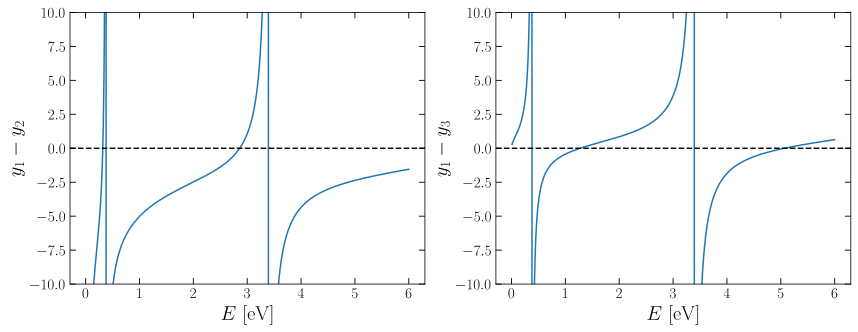

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

######################################################

ax[0].plot(En, y1-y2)

ax[0].axhline(0., 0., 1., color='k', linestyle='--')

ax[0].set_ylim(-10., 10.)

ax[0].set_xlabel(r'$E\ [\mathrm{eV}]$', fontsize=20)
ax[0].set_ylabel(r'$y_1-y_2$', fontsize=20)

######################################################

ax[1].plot(En, y1-y3)

ax[1].axhline(0., 0., 1., color='k', linestyle='--')

ax[1].set_ylim(-10., 10.)

ax[1].set_xlabel(r'$E\ [\mathrm{eV}]$', fontsize=20)
ax[1].set_ylabel(r'$y_1-y_3$', fontsize=20)

######################################################

for index_c in range(2):

    ax[index_c].tick_params(axis='x', which='both', direction='in', top=True, labelsize=15)
    ax[index_c].tick_params(axis='x', which='major', width=0.9, length=6)
    ax[index_c].tick_params(axis='x', which='minor', width=0.9, length=6)
    ax[index_c].tick_params(axis='y', which='both', direction='in', right=True, labelsize=15)
    ax[index_c].tick_params(axis='y', which='major', width=0.9, length=6)
    ax[index_c].tick_params(axis='y', which='minor', width=0.9, length=6)

plt.show()

From the second plot is more evident that:
1. even energy levels will be around $E_n \approx 0.3\ (n=0), 2.8\ (n=2)$;
2. odd energy levels will be around $E_n \approx 1.2\ (n=1), 5.0\ (n=3)$.

2. Calculate the values of $E_n$, for $n = 0,1,2,3$, to an accuracy of $0.001$ eV.

First we check the structure of the function we want to use: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html

In [9]:
def compute_even_energy_levels(E):
    
    return compute_y1(E) - compute_y2(E)

def compute_odd_energy_levels(E):
    
    return compute_y1(E) - compute_y3(E)

In [10]:
# n=0
optimize.bisect(compute_even_energy_levels, 0.1, 0.36, xtol=1.0e-4)

0.31893066406250004

In [11]:
# n=2
optimize.bisect(compute_even_energy_levels, 2.5, 3.0, xtol=1.0e-4)

2.85968017578125

In [12]:
# n=1
optimize.bisect(compute_odd_energy_levels, 0.9, 1.5, xtol=1.0e-4)

1.2739013671875001

In [13]:
# n=3
optimize.bisect(compute_odd_energy_levels, 4.5, 5.5, xtol=1.0e-4)

5.06561279296875

### Exercise 2

Consider the following ODE (van der Pol oscillator):

$\large\frac{d^2 x}{d t^ 2} - \mu (1 - x^2)\frac{dx}{dt} + \omega^2 x = 0$

Take $\omega = 1$ and $\mu = 0.1$ (small $\mu$ limit. Initial conditions: $x = 1$ and ${dx/dt = 0}$).


1. Solve the equation numerically and plot the solutions $x(t)$, ${dx/dt}$, as functions of t, from $t=0$ to $t=100$.

First, let's transform the problem by recasting the second-order differential equation into a system of two first-order differential equations.

$ \frac{dx}{dt} = y$,

$ \frac{dy}{dt} = \mu (1 - x^2)y - \omega^2 x$,

and then let's use the scipy function: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [14]:
# Y = [x, y], Y0 = [x0, y0]
def compute_derivatives(Y, time, omega, mu):
    
    x, y = Y
    
    dxdt = y
    dydt = mu*(1.-np.power(x,2.))*y - np.power(omega,2.)*x
    
    return [dxdt, dydt]

In [17]:
initial_conditions = [1., 0.]

time_interval = np.linspace(0., 100., 10000)

omega = 1.
mu = 0.1

solution = integrate.odeint(compute_derivatives,
                            initial_conditions,
                            time_interval,
                            args=(omega, mu))

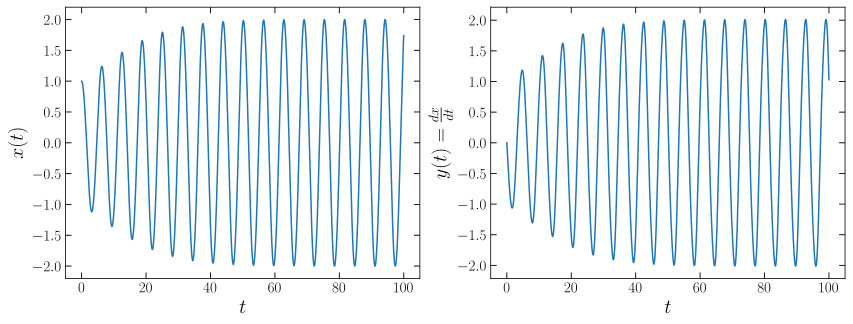

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

######################################################

ax[0].plot(time_interval, solution[:,0])

ax[0].set_xlabel(r'$t$', fontsize=20)
ax[0].set_ylabel(r'$x(t)$', fontsize=20)

######################################################

ax[1].plot(time_interval, solution[:,1])

ax[1].set_xlabel(r'$t$', fontsize=20)
ax[1].set_ylabel(r'$y(t)=\frac{dx}{dt}$', fontsize=20)

######################################################

for index_c in range(2):

    ax[index_c].tick_params(axis='x', which='both', direction='in', top=True, labelsize=15)
    ax[index_c].tick_params(axis='x', which='major', width=0.9, length=6)
    ax[index_c].tick_params(axis='x', which='minor', width=0.9, length=6)
    ax[index_c].tick_params(axis='y', which='both', direction='in', right=True, labelsize=15)
    ax[index_c].tick_params(axis='y', which='major', width=0.9, length=6)
    ax[index_c].tick_params(axis='y', which='minor', width=0.9, length=6)

plt.show()

2. For the solution derived above, make now a phase space plot, i.e., plot dx/dt ("velocity") on the y-axis vs. $x(t)$ on the x-axis

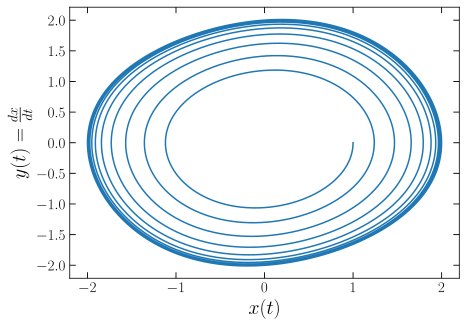

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

######################################################

ax.plot(solution[:,0], solution[:,1])

ax.set_xlabel(r'$x(t)$', fontsize=20)
ax.set_ylabel(r'$y(t)=\frac{dx}{dt}$', fontsize=20)

######################################################

ax.tick_params(axis='x', which='both', direction='in', top=True, labelsize=15)
ax.tick_params(axis='x', which='major', width=0.9, length=6)
ax.tick_params(axis='x', which='minor', width=0.9, length=6)
ax.tick_params(axis='y', which='both', direction='in', right=True, labelsize=15)
ax.tick_params(axis='y', which='major', width=0.9, length=6)
ax.tick_params(axis='y', which='minor', width=0.9, length=6)

plt.show()

3. Solve again the equation with the same values of $\omega = 1$ and $\mu = 0.1$, but change initial conditions to $x = 3$ and ${dx/dt = 2}$. Make again the three plots required in the previous two points, overplotting the new solutions to the previous ones. You should verify that at large $t$ the curves converge to the same solution (attractor).

In [20]:
new_initial_conditions = [3., 2.]

new_ic_solution = integrate.odeint(compute_derivatives,
                                   new_initial_conditions,
                                   time_interval,
                                   args=(omega, mu))

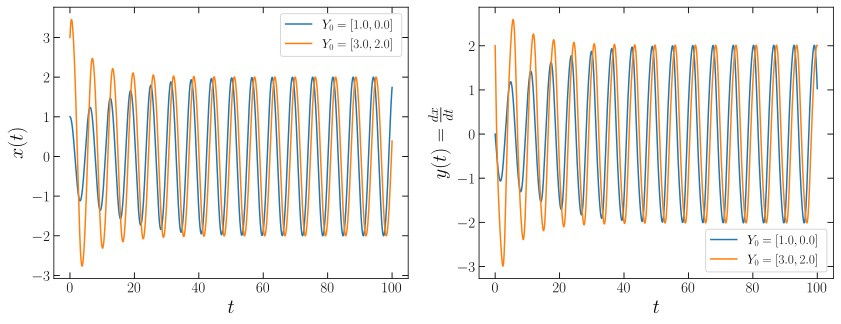

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

######################################################

ax[0].plot(time_interval, solution[:,0], label=r'$Y_0=[1.0,0.0]$')
ax[0].plot(time_interval, new_ic_solution[:,0], label=r'$Y_0=[3.0,2.0]$')

ax[0].set_xlabel(r'$t$', fontsize=20)
ax[0].set_ylabel(r'$x(t)$', fontsize=20)

######################################################

ax[1].plot(time_interval, solution[:,1], label=r'$Y_0=[1.0,0.0]$')
ax[1].plot(time_interval, new_ic_solution[:,1], label=r'$Y_0=[3.0,2.0]$')

ax[1].set_xlabel(r'$t$', fontsize=20)
ax[1].set_ylabel(r'$y(t)=\frac{dx}{dt}$', fontsize=20)

######################################################

for index_c in range(2):

    ax[index_c].tick_params(axis='x', which='both', direction='in', top=True, labelsize=15)
    ax[index_c].tick_params(axis='x', which='major', width=0.9, length=6)
    ax[index_c].tick_params(axis='x', which='minor', width=0.9, length=6)
    ax[index_c].tick_params(axis='y', which='both', direction='in', right=True, labelsize=15)
    ax[index_c].tick_params(axis='y', which='major', width=0.9, length=6)
    ax[index_c].tick_params(axis='y', which='minor', width=0.9, length=6)

    ax[index_c].legend(loc=0, fontsize=13)

plt.show()

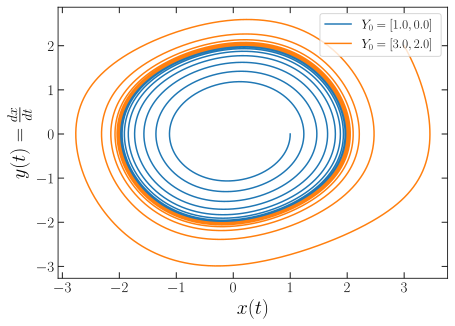

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

######################################################

ax.plot(solution[:,0], solution[:,1], label=r'$Y_0=[1.0,0.0]$')
ax.plot(new_ic_solution[:,0], new_ic_solution[:,1], label=r'$Y_0=[3.0,2.0]$')

ax.set_xlabel(r'$x(t)$', fontsize=20)
ax.set_ylabel(r'$y(t)=\frac{dx}{dt}$', fontsize=20)

######################################################

ax.tick_params(axis='x', which='both', direction='in', top=True, labelsize=15)
ax.tick_params(axis='x', which='major', width=0.9, length=6)
ax.tick_params(axis='x', which='minor', width=0.9, length=6)
ax.tick_params(axis='y', which='both', direction='in', right=True, labelsize=15)
ax.tick_params(axis='y', which='major', width=0.9, length=6)
ax.tick_params(axis='y', which='minor', width=0.9, length=6)

ax.legend(loc=0, fontsize=13)

plt.show()

4. Find the solution and make the same plots again, but now for the case $\mu = 10$ (large $\mu$ limit), leaving $\omega=1$ and setting initial conditions again to $x = 1$ and ${dx/dt = 0}$.

In [23]:
new_mu = 10.0

new_mu_solution = integrate.odeint(compute_derivatives,
                                   initial_conditions,
                                   time_interval,
                                   args=(omega, new_mu))

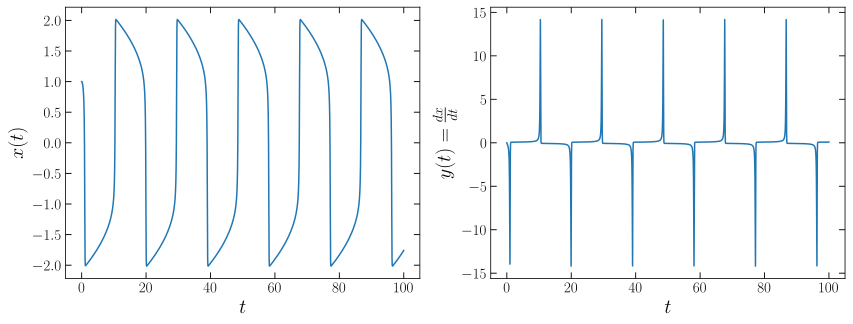

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

######################################################

ax[0].plot(time_interval, new_mu_solution[:,0])

ax[0].set_xlabel(r'$t$', fontsize=20)
ax[0].set_ylabel(r'$x(t)$', fontsize=20)

######################################################

ax[1].plot(time_interval, new_mu_solution[:,1])

ax[1].set_xlabel(r'$t$', fontsize=20)
ax[1].set_ylabel(r'$y(t)=\frac{dx}{dt}$', fontsize=20)

######################################################

for index_c in range(2):

    ax[index_c].tick_params(axis='x', which='both', direction='in', top=True, labelsize=15)
    ax[index_c].tick_params(axis='x', which='major', width=0.9, length=6)
    ax[index_c].tick_params(axis='x', which='minor', width=0.9, length=6)
    ax[index_c].tick_params(axis='y', which='both', direction='in', right=True, labelsize=15)
    ax[index_c].tick_params(axis='y', which='major', width=0.9, length=6)
    ax[index_c].tick_params(axis='y', which='minor', width=0.9, length=6)

plt.show()

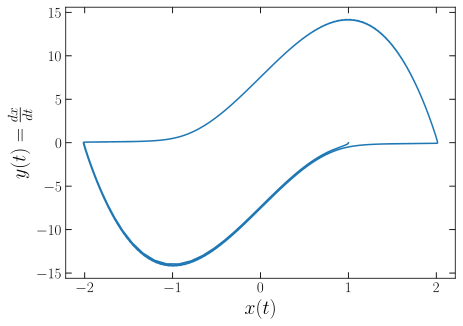

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

######################################################

ax.plot(new_mu_solution[:,0], new_mu_solution[:,1])

ax.set_xlabel(r'$x(t)$', fontsize=20)
ax.set_ylabel(r'$y(t)=\frac{dx}{dt}$', fontsize=20)

######################################################

ax.tick_params(axis='x', which='both', direction='in', top=True, labelsize=15)
ax.tick_params(axis='x', which='major', width=0.9, length=6)
ax.tick_params(axis='x', which='minor', width=0.9, length=6)
ax.tick_params(axis='y', which='both', direction='in', right=True, labelsize=15)
ax.tick_params(axis='y', which='major', width=0.9, length=6)
ax.tick_params(axis='y', which='minor', width=0.9, length=6)

plt.show()